In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import simtk.unit as unit
from tqdm import tqdm
import simtk.openmm as mm
import simtk.openmm.app as app

# Dos átomos de Lennard-Jones

## El potencial de Lennard-Jones

El potencial de Lennard-Jones entre dos partículas separadas una distancia $x$ se define mediante la siguiente expresión:

\begin{equation}
V(x) = 4 \epsilon \left[ \left( \frac{\sigma}{x} \right)^{12} - \left( \frac{\sigma}{x} \right)^{6} \right]
\end{equation}

Veamos que forma tiene esta función:

In [2]:
def LJ (x, sigma, epsilon):

    t = sigma/x
    t6 = t**6
    t12 = t6**2

    return 4.0*epsilon*(t12-t6)

Probemos, con el fin de ilustrar las propiedades de este potencial, con los siguientes valores: $\sigma = 3.0 \; \rm{Å}$ y $\epsilon = 3.0 \; \rm{kcal/mol}$.

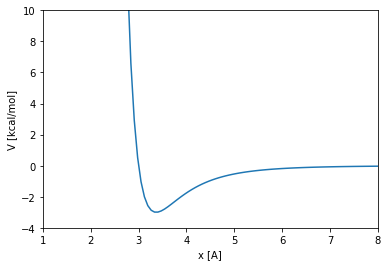

In [3]:
sigma = 3.0 * unit.angstrom
epsilon = 3.0 * unit.kilocalories_per_mole

xlim_figure = [1.0, 8.0]
ylim_figure = [-4.0, 10.0]

x = np.linspace(xlim_figure[0], xlim_figure[1], 100, True) * unit.angstrom
plt.plot(x, LJ(x, sigma, epsilon))
plt.xlim(xlim_figure)
plt.ylim(ylim_figure)
plt.xlabel('x [{}]'.format(x.unit.get_symbol()))
plt.ylabel('V [{}]'.format(epsilon.unit.get_symbol()))
plt.show()

La expresión del potential nos permite entender casi inmediatamente la interpretación de las constantes $\sigma$ y $\epsilon$. El único corte con $V(x)=0$ se produce en la coordenada $x=\sigma$.

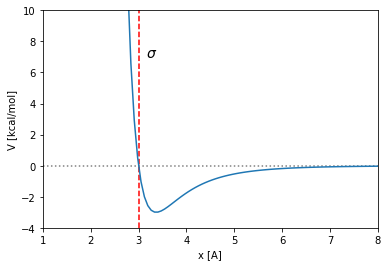

In [4]:
sigma = 3.0 * unit.angstrom
epsilon = 3.0 * unit.kilocalories_per_mole

xlim_figure = [1.0, 8.0]
ylim_figure = [-4.0, 10.0]

x = np.linspace(xlim_figure[0], xlim_figure[1], 100, True) * unit.angstrom
plt.plot(x, LJ(x, sigma, epsilon))
plt.hlines(0, xlim_figure[0], xlim_figure[1], linestyles='dotted', color='gray')
plt.vlines(sigma._value, ylim_figure[0], ylim_figure[1], linestyles='dashed', color='red')
plt.text(sigma._value+0.02*xlim_figure[1], 0.7*ylim_figure[1], '$\sigma$', fontsize=14)
plt.xlim(xlim_figure)
plt.ylim(ylim_figure)
plt.xlabel('x [{}]'.format(x.unit.get_symbol()))
plt.ylabel('V [{}]'.format(epsilon.unit.get_symbol()))
plt.show()

Y $\epsilon$ es la produndidad del pozo tomada desde $V(\infty)=0$.

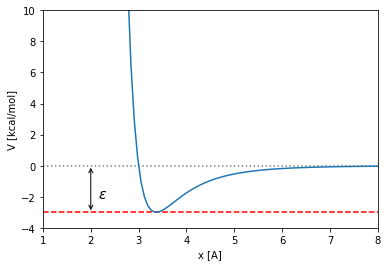

In [5]:
sigma = 3.0 * unit.angstrom
epsilon = 3.0 * unit.kilocalories_per_mole

xlim_figure = [1.0, 8.0]
ylim_figure = [-4.0, 10.0]

x = np.linspace(xlim_figure[0], xlim_figure[1], 100, True) * unit.angstrom
plt.plot(x, LJ(x, sigma, epsilon))
plt.hlines(0, xlim_figure[0], xlim_figure[1], linestyles='dotted', color='gray')
plt.hlines(-epsilon._value, xlim_figure[0], xlim_figure[1], linestyles='dashed', color='red')
plt.annotate(text='', xy=(2.0,0.0), xytext=(2.0,-epsilon._value), arrowprops=dict(arrowstyle='<->'))
plt.text(2.0+0.02*xlim_figure[1], -0.7*epsilon._value, '$\epsilon$', fontsize=14)
plt.xlim(xlim_figure)
plt.ylim(ylim_figure)
plt.xlabel('x [{}]'.format(x.unit.get_symbol()))
plt.ylabel('V [{}]'.format(epsilon.unit.get_symbol()))
plt.show()

Es importante mencionar que este potencial sólo tiene sentido para valores positivos de ambas constantes ($\epsilon > 0$ y $\sigma > 0$).

Podemos describir entonces el efecto de este potencial de la siguiente manera:
- A una distancia suficientemente grande las partículas no se ven, no interaccionan, y se comportan como partículas libres.
- A partir de una distancia no muy grande las partículas sufren una ligera atracción que hace que las dos partículas encuentren una posición de equilibrio, un mínimo de energía, a una cierta distancia característica que ahora llamaremos $x_{min}$.
- A una distancia menor que $x_{min}$ las partículas se repelen con fuerza. Es por esto que este potencial hace que las partículas se comporten como esferas semi-rígidas, pudiendo solapar su volumen mínimamente ya que el potencial bajo el mínimo no es perfectamente vertical.

Si las dos partículas son idénticas, podemos considerar que el radio de sus esferas es $\frac{1}{2}x_{min}$. Así que las dos partículas tienden a tocarse, a estar unidas, pero deben encontrarse próximas para sientan de una manera relevante la interacción atractiva. Veamos cuanto vale $x_{min}$. Igualemos a cero la primera derivada del potencial para encontrar la coordenada del mínimo:

In [6]:
x, sigma, epsilon = sy.symbols('x sigma epsilon', real=True, positive=True)
V = 4.0*epsilon*((sigma/x)**12-(sigma/x)**6)
gradV = sy.diff(V,x)
roots=sy.solve(gradV, x)
x_min = roots[0]

In [7]:
x_min

1.12246204830937*sigma

El mínimo está localizado en:

\begin{equation}
x_{min} = 2^{1/6} \sigma
\end{equation}

Donde el potential toma el valor:

\begin{equation}
V(x_{min}) = -\epsilon
\end{equation}

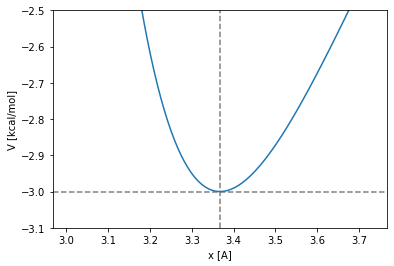

In [8]:
sigma = 3.0 * unit.angstrom
epsilon = 3.0 * unit.kilocalories_per_mole

x_min = 2**(1/6)*sigma
y_min = -epsilon

xlim_figure = [x_min._value-0.4, x_min._value+0.4]
ylim_figure = [y_min._value-0.1, y_min._value+0.5]

x = np.linspace(xlim_figure[0], xlim_figure[1], 100, True) * unit.angstroms
plt.plot(x, LJ(x, sigma, epsilon))
plt.hlines(y_min._value, xlim_figure[0], xlim_figure[1], linestyles='dashed', color='gray')
plt.vlines(x_min._value, ylim_figure[0], ylim_figure[1], linestyles='dashed', color='gray')
plt.xlim(xlim_figure)
plt.ylim(ylim_figure)
plt.xlabel('x [{}]'.format(x.unit.get_symbol()))
plt.ylabel('V [{}]'.format(epsilon.unit.get_symbol()))
plt.show()

Así que, como dijimos anteriormente, si las partículas en contacto encuentran su posición de equilibrio en $2^{1/6}\sigma$, si las consideramos iguales, el radio de las esferas blandas es:

\begin{equation}
r = \frac{1}{2} x_{min} = 2^{-5/6} \sigma
\end{equation}

Y decimos esferas blandas o semi-rígidas porque pueden solapar ligeramente aunque energéticamente esto no resulte favorable.

## ¿Qué paso de integración puede ser adecuado para simular este potencial?

Para tener una idea del orden del paso de tiempo que podemos usar para no tener problemas de integración podemos acudir a la regla "heurística" de que el paso de tiempo debe ser al menos 10 veces más pequeño que el periodo de las pequeñas oscilaciones armónicas entorno a los mínimos de potencial. Veamos entonces el periodo de oscilación de una partícula de masa $m$ en las proximidades del mínimo de este potencial. Tal y como vimos para el doble pozo, el valor de la segunda derivada del potencial en el mínimo es propocional a la curvatura (a la constante del potencial armónico):

In [9]:
x, sigma, epsilon = sy.symbols('x sigma epsilon', real=True, positive=True)
V = 4.0*epsilon*((sigma/x)**12-(sigma/x)**6)
gradV = sy.diff(V,x)
grad2V = sy.diff(V,x,x)

x_min = sy.solve(gradV,x)[0]
k_harm = grad2V.subs(x, x_min)

In [10]:
k_harm

57.1464378708551*epsilon/sigma**2

Podemos entonces comprobar que la constante armónica del término de segundo orden de la expansión de Taylor de este potencial en $x=x_min$ es:

\begin{equation}
k=36 \cdot 2^{2/3} \frac{\epsilon}{\sigma^{2}}
\end{equation}

Y el periodo de oscilación de una partícula de masa $m$ en un potencial armónico descrito como $\frac{1}{2}kx^{2}$ es: 

\begin{equation}
T = 2\pi\sqrt{\frac{m}{k}}
\end{equation}

De tal manera que para el mínimo del potencial armónico:

\begin{equation}
T = \frac{\pi}{3\cdot 2^{1/3}}\sqrt{\frac{m\sigma^{2}}{\epsilon}}
\end{equation}

Para una masa, por ejemplo, de 50 umas, con los valores de los parámetros anteriores:

In [11]:
mass = 50.0 * unit.amu
sigma = 3.0 * unit.angstrom
epsilon = 3.0 * unit.kilocalories_per_mole

k = 36 * 2**(2/3) * epsilon/sigma**2

tau = 2*np.pi * np.sqrt(mass/k)

print(tau)

0.4976626842436859 ps


Como podemos ver en la unidad XXX, tenemos que tomar este valor de manera muy conservadora. La rama repulsiva del potencial de Lennard-Jones se levanta muy rápidamente, así que haremos bien en tomar un paso de integración un tanto menor que $T/10$. 

## Dos átomos de Lennard-Jones en una caja periódica

El sistema con el que trabajaremos será dos átomos interaccionando entre sí mediante un potencial de tipo Lennard-Jones en un espacio tridimensional con condiciones cúbicas de contorno periódicas. Pero no consideraremos los átomos de la misma naturaleza. El primer átomo será de un elemento ficticio llamado "A" y el segundo de otro elemento ficticio "B". Aunque más arriba hayamos construido el potencial con un parámetro $\sigma$ y otro $\epsilon$, has de saber que en la práctica las interacciones entre átomos se parametrizan otorgando atributos o parámetros a cada átomo. En el caso de las interacciones de tipo Lennard-Jones, se asignan valores de $\sigma$ y $\epsilon$ a los átomos y se conviene unas reglas de construcción del potencial resultante entre dos átomos cualesquiera. En el caso de OpenMM, la construcción del potencial desde los parámetros del átomo "A" ($\sigma_{A}$ y $\epsilon_{A}$) y los parámetros del átomo "B" ($\sigma_{B}$ y $\epsilon_{B}$):

\begin{equation}
\sigma_{red} = \frac{\sigma_{1}+\sigma_{2}}{2}
\end{equation}

\begin{equation}
\epsilon_{red} = \sqrt{\epsilon_{1}\epsilon_{2}}
\end{equation}


En nuestro caso los átomos "A" y "B" vienen descritos por los parámetros:

In [12]:
# Particula A
mass_A = 40.0 * unit.amu
sigma_A = 2.0 * unit.angstroms
epsilon_A = 2.0 * unit.kilocalories_per_mole
charge_A = 0.0 * unit.elementary_charge      # no hay interacción coulombiana para OpenMM

# Particula B
mass_B = 120.0 * unit.amu
sigma_B = 4.0 * unit.angstroms
epsilon_B = 4.5 * unit.kilocalories_per_mole
charge_B = 0.0 * unit.elementary_charge      # no hay interacción coulombiana para OpenMM

De esta manera los parámetros reducidos del potencial son:

In [13]:
sigma_red = 0.5*(sigma_A+sigma_B)
epsilon_red = np.sqrt(epsilon_A*epsilon_B)

print("sigma_red={}, epsilon_red={}".format(sigma_red, epsilon_red))

sigma_red=3.0 A, epsilon_red=3.0 kcal/mol


De esta manera la distancia de equilibrio entre los dos átomos es:

In [14]:
x_min = 2.0**(1/6) * sigma_red

print(x_min)

3.367386144928119 A


Y para calcular el periodo de las pequeñas oscilaciones armónicas de la distancia entre los dos átomos recurriremos al concepto de "masa reducida". La distancia entre dos partículas que interaccionan mediante un potencial se comporta igual que una partícula cuya masa es la masa reducida de ambas partículas moviendose líbremente en dicho potencial:

\begin{equation}
m_{red} = \frac{m_{1}m_{2}}{m_{1}+m_{2}}
\end{equation}

In [15]:
mass_red = (mass_A*mass_B)/(mass_A+mass_B)
mass_red = mass_red._value * unit.amu # No sé porque lo convierte a daltons y luego no sabe manejarlos

Así que el periodo de pequeñas oscilaciones armónicas será:

In [16]:
k = 36 * 2**(2/3) * epsilon_red/sigma_red**2

tau = 2*np.pi * np.sqrt(mass_red/k)

print(tau)

0.3854878576209352 ps


Tomaremos entonces el paso de integración igual a 0.005 ps.

Construyamos ahora el sistema para trabajar con OpenMM. Situemos las partículas en una caja cúbica periodica de 4nm de lado.

In [17]:
# Creación del sistema.

system = mm.System()

non_bonded_force = mm.NonbondedForce()
non_bonded_force.setNonbondedMethod(mm.NonbondedForce.CutoffPeriodic)

reduced_sigma = 0.5*(sigma_A+sigma_B)
cutoff_distance = 4.0*reduced_sigma
switching_distance = 3.0*reduced_sigma
non_bonded_force.setUseSwitchingFunction(True)
non_bonded_force.setCutoffDistance(cutoff_distance)
non_bonded_force.setSwitchingDistance(switching_distance)

# Átomo A
system.addParticle(mass_A)
non_bonded_force.addParticle(charge_A, sigma_A, epsilon_A)

# Átomo B
system.addParticle(mass_B)
non_bonded_force.addParticle(charge_B, sigma_B, epsilon_B)

# Caja periódica

system.setDefaultPeriodicBoxVectors([5.0, 0.0, 0.0]*unit.nanometers,
                                    [0.0, 5.0, 0.0]*unit.nanometers,
                                    [0.0, 0.0, 5.0]*unit.nanometers)

_ = system.addForce(non_bonded_force)

In [18]:
# Definición del estado termodinámico y el integrador.

step_size = 5.0*unit.femtoseconds
temperature = 300*unit.kelvin
friction = 5.0/unit.picosecond # Damping para la dinámica de Langevin

integrator = mm.LangevinIntegrator(temperature, friction, step_size)

In [19]:
# Creación de la plataforma.

platform_name = 'CUDA'
platform = mm.Platform.getPlatformByName(platform_name)

In [20]:
# Creación del contexto.

context = mm.Context(system, integrator, platform)

OpenMMException: No compatible CUDA device is available

In [ ]:
# Condiciones iniciales

initial_positions  = np.zeros([2, 3], np.float32) * unit.angstroms
initial_velocities = np.zeros([2, 3], np.float32) * unit.angstroms/unit.picoseconds

initial_positions[0, :] = 1.0 * unit.nanometers
initial_positions[1, :] = 2.0 * unit.nanometers

context.setPositions(initial_positions)
context.setVelocities(initial_velocities)

In [ ]:
# Parámetros de la simulación.

simulation_time = 10.0*unit.nanosecond
saving_time = 1.0*unit.picoseconds

In [ ]:
n_steps_per_period = int(saving_time/step_size) # número de pasos del periodo de guardado
n_periods = int(simulation_time/saving_time) # número de periodos guardados

In [ ]:
# Creación de arrays reporteros del tiempo, la posición y la velocidad.

times = np.zeros([n_periods], np.float32) * unit.picoseconds
positions = np.zeros([n_periods, 2, 3], np.float32) * unit.angstroms
velocities = np.zeros([n_periods, 2, 3], np.float32) * unit.angstroms/unit.picosecond
potential_energies   = np.zeros([n_periods], np.float32) * unit.kilocalories_per_mole
kinetic_energies     = np.zeros([n_periods], np.float32) * unit.kilocalories_per_mole

In [ ]:
# Almacenamiento en reporteros de las condiciones iniciales para tiempo 0

state = context.getState(getPositions=True, getVelocities=True, getEnergy=True, enforcePeriodicBox=True)
times[0] = state.getTime()
positions[0] = state.getPositions()
velocities[0] = state.getVelocities()
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

In [ ]:
# Ejecuto el bucle sobre el número de periodos que vamos a simular

for ii in tqdm(range(1, n_periods)):
    context.getIntegrator().step(n_steps_per_period)
    state = context.getState(getPositions=True, getVelocities=True, getEnergy=True, enforcePeriodicBox=True)
    times[ii] = state.getTime()
    positions[ii] = state.getPositions()
    velocities[ii] = state.getVelocities()
    kinetic_energies[ii]=state.getKineticEnergy()
    potential_energies[ii]=state.getPotentialEnergy()

Nota: mira lo que sucede si omites "enforcePeriodicBox=True" o haces "enforcePeriodicBox=False".

Ya tenemos la trayectoria de las dos partículas en la caja periódica. Ahora calculemos la distancia entre ellas en función del tiempo, corrigiendo claro las condiciones de contorno periodicas:

In [ ]:
def distance_AB_with_PBC(trajectory, box_length):

    box_half_length=0.5*box_length
    n_frames = trajectory.shape[0]
    output = np.zeros([n_frames])*unit.angstroms
    for ii in range(n_frames):
        r_ab = trajectory[ii,1,:]-trajectory[ii,0,:]
        for jj in range(3):
            if r_ab[jj]>box_half_length:
                r_ab[jj]-=box_length
            elif r_ab[jj]<-box_half_length:
                r_ab[jj]+=box_length
        output[ii]=(r_ab[0]**2+r_ab[1]**2+r_ab[2]**2)**0.5
    
    return output

In [ ]:
distance = distance_AB_with_PBC(positions, 4.0*unit.nanometers)

In [ ]:
plt.rcParams['figure.figsize'] = 18, 3

plt.plot(times, distance)
plt.ylabel('distance A-B ({})'.format(distance.unit))
plt.xlabel('time ({})'.format(times.unit))
plt.show()

De la distancia en función del tiempo podemos distinguir que hubo eventos de asociación-disociación. Veamos ahora la energía potencial del sistema en función del tiempo.

In [ ]:
plt.rcParams['figure.figsize'] = 18, 4

plt.plot(times.in_units_of(unit.nanoseconds), potential_energies[:])
plt.ylabel('Potential Energy ({})'.format(potential_energies.unit))
plt.xlabel('time ({})'.format(unit.nanoseconds))
plt.show()

En 10 ns vemos varios eventos de unión.